In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf

In [3]:
df=pd.read_csv("Sunspots.csv",index_col="Date",parse_dates=True)
#pandas recognizes that the data is in time format(Date) when we parse_dates
# which tells the pandas that the Time series is in monthly basis


In [4]:
print(df.head())

            Unnamed: 0  MonthlyMean
Date                               
1749-01-31           0         96.7
1749-02-28           1        104.3
1749-03-31           2        116.7
1749-04-30           3         92.8
1749-05-31           4        141.7


In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df.head()

,MonthlyMean
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


In [10]:
from sklearn.preprocessing import MinMaxScaler

## Data Normalization

In [11]:
#prepare of normalization
values=df.values
values=values.reshape((len(values),1))
#train the normalization
scaler=MinMaxScaler(feature_range=(0,1))
scaler=scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
	print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

Min: 0.000000, Max: 398.200000
[0.24284279]
[0.26192868]
[0.29306881]
[0.23304872]
[0.35585133]
[96.7]
[104.3]
[116.7]
[92.8]
[141.7]


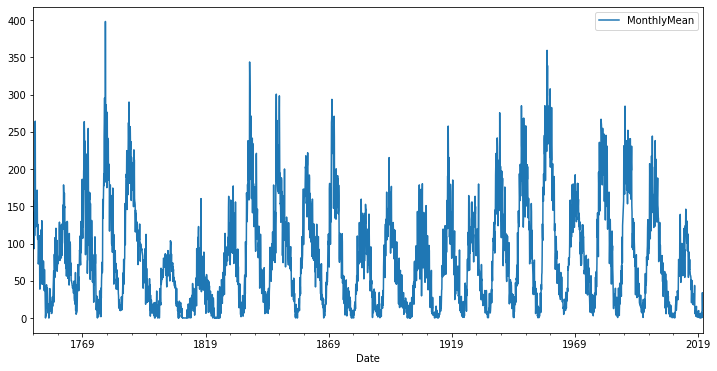

In [12]:
df.plot(figsize=(12,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE12544BC8>]],
      dtype=object)

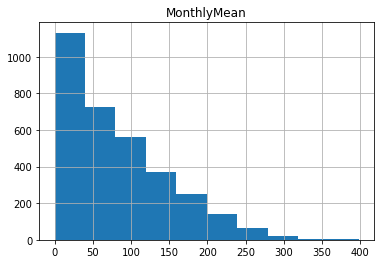

In [13]:
df.hist()



In [14]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [15]:
#Standardize time series data

scaler= StandardScaler()
scaler= scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
	print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
	print(inversed[i])

Mean: 81.778775, StandardDeviation: 67.878879
[0.21982132]
[0.33178546]
[0.51446378]
[0.16236604]
[0.88276686]
[96.7]
[104.3]
[116.7]
[92.8]
[141.7]


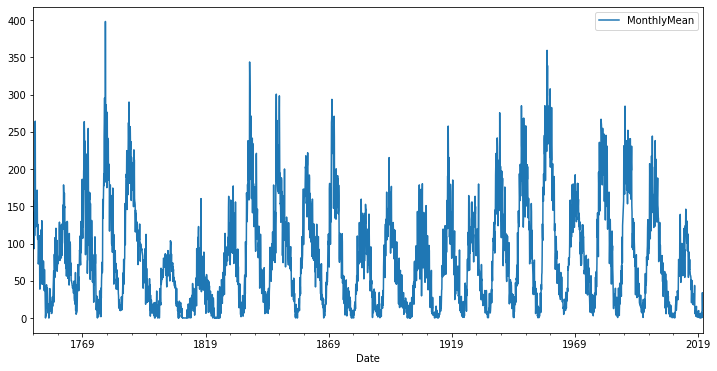

In [16]:
df.plot(figsize=(12,6))

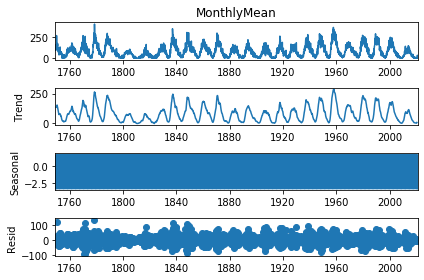

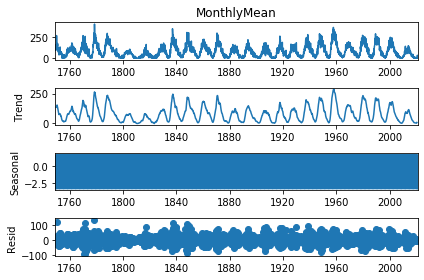

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(df['MonthlyMean'])
results.plot()

In [18]:
len(df)

3265

In [19]:
df.describe()

,MonthlyMean
count,3265.000000
mean,81.778775
std,67.889277
min,0.000000
25%,23.900000
50%,67.200000
75%,122.500000
max,398.200000


## Training the Data

In [20]:
train=df.iloc[:3205]
test=df.iloc[3205:]

In [21]:
df.head(),df.tail()


(            MonthlyMean
 Date                   
 1749-01-31         96.7
 1749-02-28        104.3
 1749-03-31        116.7
 1749-04-30         92.8
 1749-05-31        141.7,
             MonthlyMean
 Date                   
 2020-09-30          0.6
 2020-10-31         14.4
 2020-11-30         34.0
 2020-12-31         21.8
 2021-01-31         10.4)

In [22]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [23]:
scaled_train[:10]

array([[0.20156129],
       [0.31355229],
       [0.49627446],
       [0.14409222],
       [0.86466594],
       [0.82782679],
       [1.10485718],
       [0.40491338],
       [0.64068392],
       [0.63036896]])

In [24]:
from tensorflow import keras

In [25]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [26]:
#define generator
n_input=12
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [28]:
#Defining the model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
#the activation function is responsible for transforming the summed weighted input from the node into the activation of 
#the node or output for that input
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#Adam is a replacement optimization algorithm for stochastic 
#gradient descent for training deep learning models

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [30]:
#fit model
model.fit(generator,epochs=100)


Epoch 1/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1741
Epoch 2/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1466
Epoch 3/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1453
Epoch 4/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1434
Epoch 5/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1429
Epoch 6/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1409
Epoch 7/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1416
Epoch 8/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1386
Epoch 9/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1378
Epoch 10/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1378
Epoch 11/100
3193/3193 [==============================] - 13s 4ms/step - loss: 0.1375
Epoch 12/100
3193/3193 [==============================] - 13s 

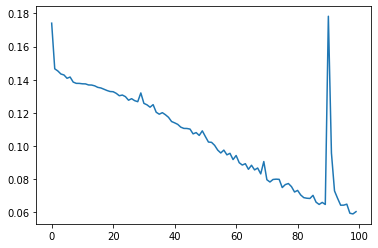

In [34]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [35]:
last_train_batch=scaled_train[-12:]

In [36]:
last_train_batch=last_train_batch.reshape((-1,n_input,n_features))

In [37]:
last_train_batch=last_train_batch.reshape((-1,n_input,n_features))

array([[-0.5705633]], dtype=float32)

In [38]:
scaled_test[0]

array([-0.39228577])

In [39]:
test_predictions=[]
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [40]:
test_predictions

[array([-0.5705633], dtype=float32),
 array([-0.6103417], dtype=float32),
 array([-0.5674305], dtype=float32),
 array([-0.5070375], dtype=float32),
 array([-0.6023364], dtype=float32),
 array([-0.63902324], dtype=float32),
 array([-0.6419974], dtype=float32),
 array([-0.58135533], dtype=float32),
 array([-0.6335272], dtype=float32),
 array([-0.6617473], dtype=float32),
 array([-0.72305596], dtype=float32),
 array([-0.7448158], dtype=float32),
 array([-0.83880347], dtype=float32),
 array([-0.88565177], dtype=float32),
 array([-0.9174184], dtype=float32),
 array([-0.94438344], dtype=float32),
 array([-0.95694214], dtype=float32),
 array([-0.96220595], dtype=float32),
 array([-0.9695458], dtype=float32),
 array([-0.9730819], dtype=float32),
 array([-0.97806567], dtype=float32),
 array([-0.98709434], dtype=float32),
 array([-1.0027833], dtype=float32),
 array([-1.0135713], dtype=float32),
 array([-1.0311787], dtype=float32),
 array([-1.0443411], dtype=float32),
 array([-1.0556827], dtype=f

In [41]:
test.head()

,MonthlyMean
Date,
2016-02-29,56.4
2016-03-31,54.1
2016-04-30,37.9
2016-05-31,51.5
2016-06-30,20.5


In [42]:
true_predictions=scaler.inverse_transform(test_predictions)

In [43]:
test['Predictions']=true_predictions

D:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


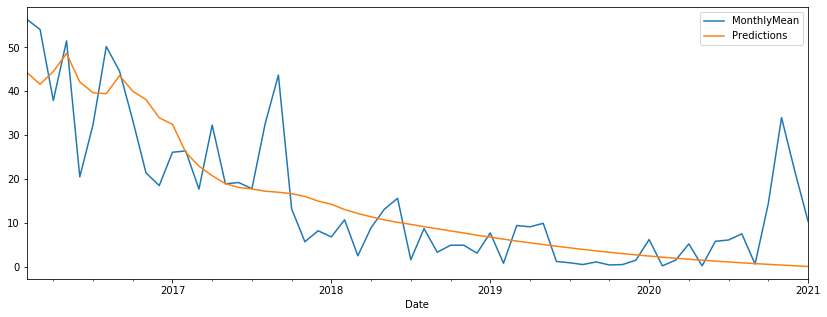

In [44]:
test.plot(figsize=(14,5))

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['MonthlyMean'],test['Predictions']))
print(rmse)

9.442995307501413
